<a href="https://colab.research.google.com/github/Almasyriqi/PCVK_Genap_2022/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modul 10 PCVK**

Nama : M. Syifa'ul Ikrom Almasyriqi

Kelas : TI-3G

NIM : 1941720057

> **Import Drive**

1. Import folder pada drive

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


> **Import Library**

2. Import library yang diperlukan

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

> **Global Threshold Manual**

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) secara
manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

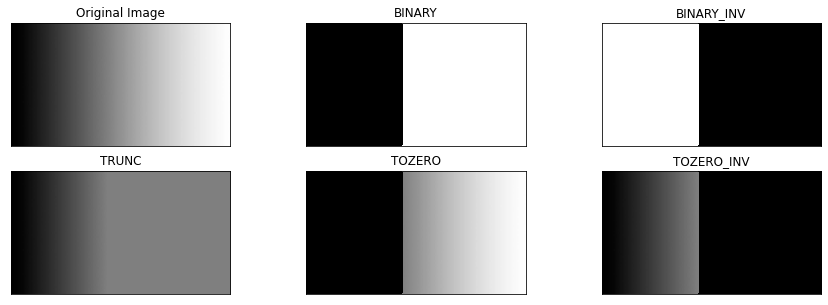

In [ ]:
# Global threshold Manual

# Input image
input_image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/gradient.jpg')

# Output image
thresh1 = input_image.copy()
thresh2 = input_image.copy()
thresh3 = input_image.copy()
thresh4 = input_image.copy()
thresh5 = input_image.copy()
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [input_image, thresh1, thresh2, thresh3, thresh4, thresh5]

# Threshold
thresh = 127

def globalthreshold(threshold, img, type):
  for i in range(input_image.shape[0]):
    for j in range(input_image.shape[1]):
      for c in range(input_image.shape[2]):
        # Binary Threshold
        if(type == 1):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 255
          else:
            img[i,j,c] = 0
        # Binary-Inverted Threshold
        elif(type == 2):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = 255
        # Truncate Threshold
        elif(type == 3):
          if(img[i,j,c] > threshold):
            img[i,j,c] = threshold
          else:
            img[i,j,c] = img[i,j,c]
        # Threshold To Zero
        elif(type == 4):
          if(img[i,j,c] > threshold):
            img[i,j,c] = img[i,j,c]
          else:
            img[i,j,c] = 0
        # Threshold To Zero – Inverted
        elif(type == 5):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = img[i,j,c]
  return img

# Memanggil fungsi globalThreshold
for a in range(1, len(images)):
  images[a] = globalthreshold(thresh, images[a], a)

#Membuat figure
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

> **Otsu Thresholding Tanpa Library**

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold 
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image 
lena_gs_lc2.jpg agar benar2 terlihat beda antara hasil otsu’s dengan global threshold 
biasa)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars


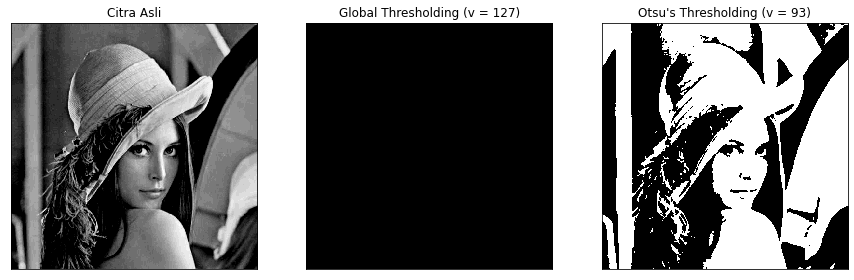

In [ ]:
# Otsu Thresholding tanpa library

# Input image
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/lena_gs_lc2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(img,(5,5),0)
blurImage = blur.copy()
thresh = 127

def total_pix(image):
  size = image.shape[0] * image.shape[1]
  return size

def histogramify(image):
  grayscale_array = []
  for w in range(0,image.shape[0]):
    for h in range(0,image.shape[1]):
      intensity = image[w,h]
      grayscale_array.append(intensity)

  total_pixels = image.shape[0] * image.shape[1]
  bins = range(0,257)
  img_histogram = np.histogram(grayscale_array, bins)
  return img_histogram


def otsu(image):
  hist = histogramify(image)
  total = total_pix(image)
  current_max, threshold = 0, 0
  sumT, sumF, sumB = 0, 0, 0
  for i in range(0,256):
    sumT += i * hist[0][i]
  weightB, weightF = 0, 0
  varBetween, meanB, meanF = 0, 0, 0
  for i in range(0,256):
    weightB += hist[0][i]
    weightF = total - weightB
    if weightF == 0:
      break
    sumB += i*hist[0][i]
    sumF = sumT - sumB
    meanB = sumB/weightB
    meanF = sumF/weightF
    varBetween = weightB * weightF
    varBetween *= (meanB-meanF)*(meanB-meanF)
    if varBetween > current_max:
      current_max = varBetween
      threshold = i 
  return threshold

def globalTreshold(threshold, img):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if(img[i,j] > threshold):
        img[i,j] = 255
      else:
        img[i,j] = 0
  return img

threshold = otsu(blur)
# global threshold dengan nilai threshold otsu
image = globalTreshold(threshold, blur)

# global threshold dengan nilai 127
binaryImage = globalTreshold(thresh, blurImage)

titles = ['Citra Asli','Global Thresholding (v = 127)',"Otsu's Thresholding (v = 93)"]
images = [img, binaryImage, image]

#Membuat figure
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(1,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

> **Histogram Citra Tersegmentasi**

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image 
saja. Gunakan image Lily atau Leaves yang sudah disediakan di folder images.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

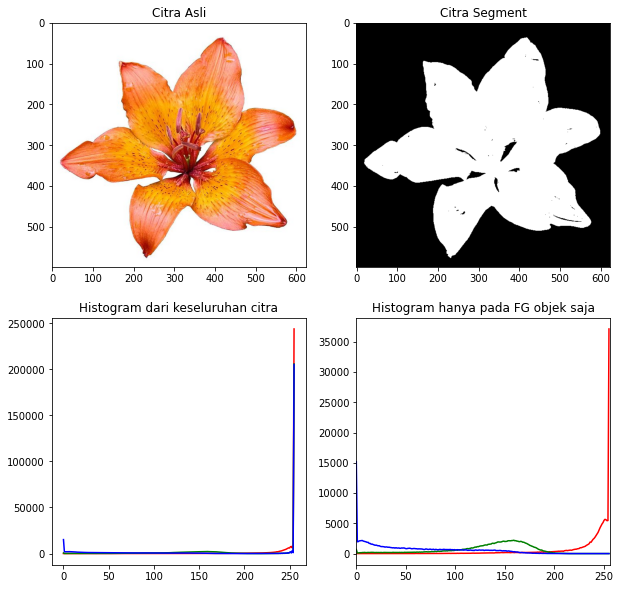

In [ ]:
# histogram citra tersegmentasi

# Input image
input_image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/lily.jpg')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

ret,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(input_image) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv2.calcHist([input_image],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([input_image],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

> **Segmentasi Warna Menggunakan Library KMeans OpenCV**

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang 
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya 
warna tertentu saja)


Kendala yang dihadapi saat menggunakan KMEANS dari OpenCV adalah label warna yang didapat random (acak) berdasarkan cluster terdekat.
Jika ingin mendapatkan hasil yang sama dengan yang ada di jobsheet maka harus di reload terus menerus


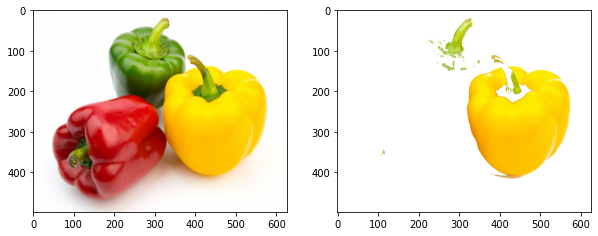

In [ ]:
# Segmentasi warna 

img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/peppers.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 1, cv2.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()

# ubah pixel selain di cluster 2 menjadi putih
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels != cluster] = [255, 255, 255]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image)

print("Kendala yang dihadapi saat menggunakan KMEANS dari OpenCV adalah label warna yang didapat random (acak) berdasarkan cluster terdekat.")
print("Jika ingin mendapatkan hasil yang sama dengan yang ada di jobsheet maka harus di reload terus menerus")

> **Segmentasi Warna Menggunakan Library KMeans sklearn**

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc86c87cfd0>,
 <matplotlib.image.AxesImage at 0x7fc86bfe6850>)

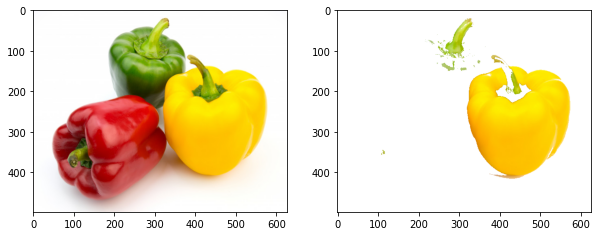

In [ ]:
# Segmentasi warna menggunakan library scikit learn KMeans
# Jika menggunakan library ini tidak ada kendala karena dapat set nilai randomnya

img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/peppers.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(pixel_values)
labels = kmeans.labels_

# ubah pixel selain di cluster 2 menjadi putih
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels != cluster] = [255, 255, 255]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image)

> **Thresholding Biner crossword.jpg**

Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda 
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. 

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc86ed1c990>,
 Text(0.5, 1.0, 'citra hasil thresholding biner'))

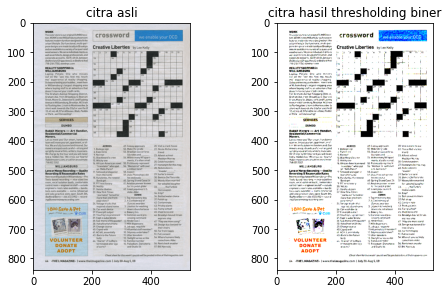

In [ ]:
# Tresholding biner crossword.jpg
# Input image
input_image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/crossword.jpg')

output_image = input_image.copy()
thresh = 127

# Menggunakan Binary Threshold pada function globalThreshold yang dibuat sebelumnya
output_image = globalthreshold(thresh, output_image, 1)

plt.figure(figsize = (8,10))
plt.subplot(2,2,1),plt.imshow(input_image), plt.title("citra asli")
plt.subplot(2,2,2),plt.imshow(output_image), plt.title("citra hasil thresholding biner")